Formatting FEH XML data

In [1]:
# Mount drive for google colab and install beautiful soup 
#from google.colab import drive
#drive.mount('/content/drive')
%pip install beautifulsoup4 lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Read FEH data
from bs4 import BeautifulSoup
#with open('/content/drive/My Drive/EA_hackathon/FEH data/FEH_Catchment_Descriptors_426050_240500 (compatible with ReFHS2.3+).xml', 'r') as f: #for colab
with open('../data/FEH data/FEH_Catchment_Descriptors_426050_240500 (compatible with ReFHS2.3+).xml', 'r') as f: #for local
    rawData = f.read() 
fehData = BeautifulSoup(rawData, "xml")

In [3]:
# View all property names
print([tag.name for tag in fehData.find_all()])

# View value for specific property
print(fehData.area)

['FEHCDROMExportedDescriptors', 'CatchmentDescriptors', 'CatchmentCentroid', 'area', 'altbar', 'aspbar', 'aspvar', 'bfihost', 'bfihost19', 'dplbar', 'dpsbar', 'farl', 'fpext', 'fpdbar', 'fploc', 'ldp', 'propwet', 'rmed_1h', 'rmed_1d', 'rmed_2d', 'saar', 'saar4170', 'sprhost', 'urbconc1990', 'urbext1990', 'urbloc1990', 'urbconc2000', 'urbext2000', 'urbloc2000', 'CatchmentAverageDDFValues', 'c', 'd1', 'd2', 'd3', 'e', 'f', 'PointDDFValues', 'c_1_km', 'd1_1_km', 'd2_1_km', 'd3_1_km', 'e_1_km', 'f_1_km', 'CatchmentAverageDDF2013Values', 'ReturnPeriods', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths', 'Depths']
<area>185.16</area>


In [4]:
# Get values for Depth-Duration-Frequency of rainfall
import numpy as np
returnPeriods = np.asarray(fehData.find("ReturnPeriods").contents[0].split(','))

depths = []
for value in fehData.find_all("Depths"):
    depths.append(value.attrs['duration'])
depths = np.asarray(depths)

DDF = []
for value in fehData.find_all("Depths"):
    DDF.append(value.contents[0].split(','))
DDF = np.asarray(DDF)

Depth Duration Frequency explanation: https://opw.hydronet.com/data/files/Work%20Package1_2%20Final%20Report.pdf


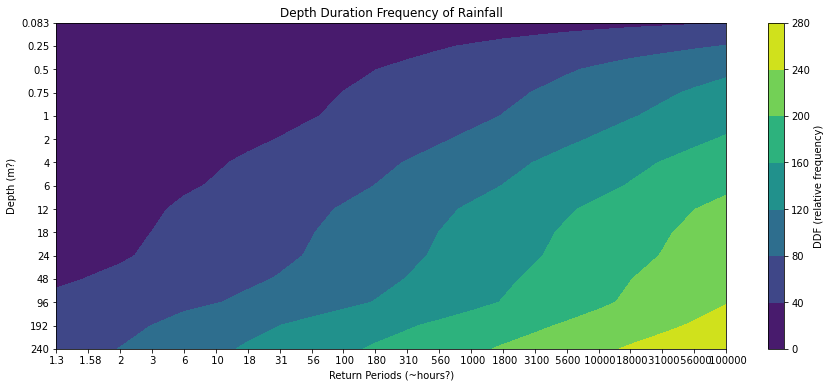

In [5]:
# DDF plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(xlabel="Return Periods (~hours?)", ylabel="Depth (m?)", title="Depth Duration Frequency of Rainfall")
cm = ax.contourf(returnPeriods,depths,DDF)
ax.invert_yaxis()
cbar = fig.colorbar(cm)
cbar.set_label('DDF (relative frequency)')

